In [80]:
#Install the necessary packages

#!pip install yfinance
#!pip install matplotlib==3.5.3
#!pip install arch

In [81]:
#Standard packages
import numpy as np
import pandas as pd

#Dates
from datetime import datetime, timedelta

#Finance packages
import yfinance as yf
from arch import arch_model

#Statistics
from scipy.stats import t
from scipy.stats import skew, kurtosis

#Plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from matplotlib import rcParams

rcParams["font.size"] = 20
rcParams["axes.labelsize"] = 30

rcParams["xtick.labelsize"] = 16
rcParams["ytick.labelsize"] = 16

rcParams["figure.figsize"] = (8,6)

# Exercise 1. Analysis of the S&P 500 volatility time-series

**1. Download the data**

In [82]:
start = datetime(1997, 1, 1)
end = datetime.today()

assets = "^GSPC"

df = yf.download(assets, start=start, end=end, progress=False)

df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-01-02,740.739990,742.809998,729.549988,737.010010,737.010010,463230000
1997-01-03,737.010010,748.239990,737.010010,748.030029,748.030029,452970000
1997-01-06,748.030029,753.309998,743.820007,747.650024,747.650024,531350000
1997-01-07,747.650024,753.260010,742.179993,753.229980,753.229980,538220000
1997-01-08,753.229980,755.719971,747.710022,748.409973,748.409973,557510000
...,...,...,...,...,...,...
2024-04-02,5204.290039,5208.339844,5184.049805,5205.810059,5205.810059,3886590000
2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000


**2. Compute the log returns and the moving volatility of log returns**

**Clue:** *The pandas.Series.rolling(window).statistic() method computes the moving version of the chosen statistic over the given window size through all the series.*

**Example**: *df["Col1"].rolling(100).mean()*

In [83]:
window = 25

df["LogRet"] = np.log( 1 + df["Adj Close"].pct_change() )
df["MV"] = df["LogRet"].rolling(window).std()

df

,Open,High,Low,Close,Adj Close,Volume,LogRet,MV
Date,,,,,,,,
1997-01-02,740.739990,742.809998,729.549988,737.010010,737.010010,463230000,NaN,NaN
1997-01-03,737.010010,748.239990,737.010010,748.030029,748.030029,452970000,0.014842,NaN
1997-01-06,748.030029,753.309998,743.820007,747.650024,747.650024,531350000,-0.000508,NaN
1997-01-07,747.650024,753.260010,742.179993,753.229980,753.229980,538220000,0.007436,NaN
1997-01-08,753.229980,755.719971,747.710022,748.409973,748.409973,557510000,-0.006420,NaN
...,...,...,...,...,...,...,...,...
2024-04-02,5204.290039,5208.339844,5184.049805,5205.810059,5205.810059,3886590000,-0.007265,0.005917
2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000,0.001091,0.005915
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000,-0.012411,0.006483


**3. Plot the returns together with the returns +- the moving volatility and the returns +- the std deviation (horizontal line). Plot also the moving volatility alone. What do you observe?**

**Clue**: *Basically I ask you to reproduce the figure I uploaded to UIB digital (contact me if you don't find it)*

0.00028487929544820305


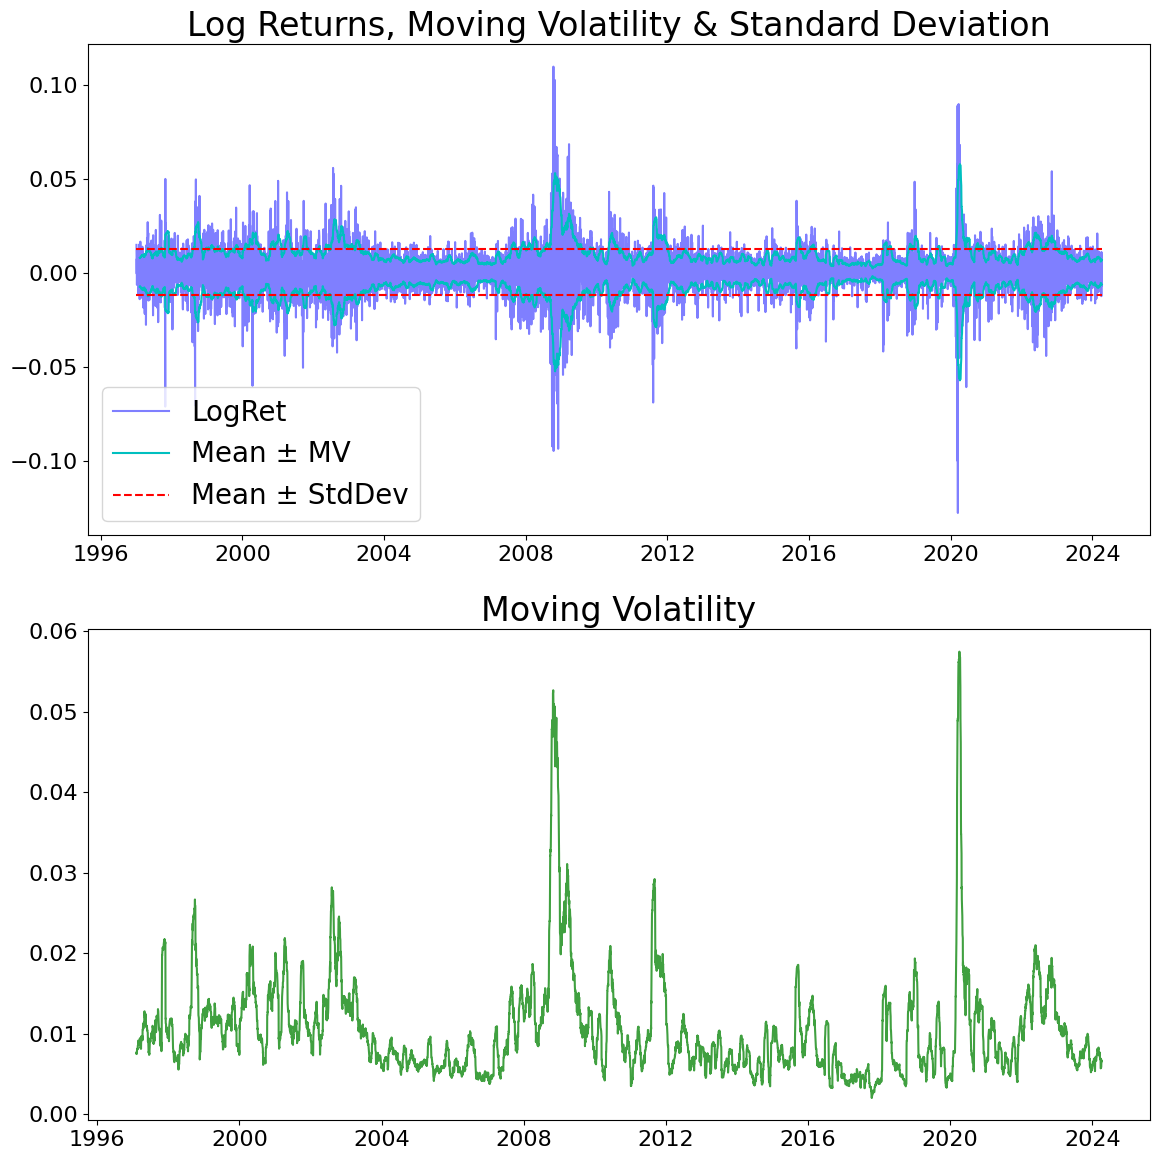

In [84]:
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

mean = df["LogRet"].mean()
print(mean)
std_dev = np.std(df["LogRet"])  # Overall standard deviation of log returns

# Plot 1: LogReturns, Mean ± Moving Volatility
# & Mean ± Std Deviation (horizontal line)
ax[0].plot(df.index, df["LogRet"], label="LogRet", color="b", alpha=0.5)

ax[0].plot(df.index, mean + df["MV"], color="c", label="Mean ± MV")
ax[0].plot(df.index, mean - df["MV"], color="c")

ax[0].hlines(y=mean + std_dev, xmin=df.index[0], xmax=df.index[-1], colors="r", linestyles="--", label="Mean ± StdDev")
ax[0].hlines(y=mean - std_dev, xmin=df.index[0], xmax=df.index[-1], colors="r", linestyles="--")

ax[0].legend()
ax[0].set_title("Log Returns, Moving Volatility & Standard Deviation")

# Plot 3: Moving Volatility Alone
ax[1].plot(df.index, df["MV"], color="g", alpha=0.75)
ax[1].set_title("Moving Volatility")

plt.tight_layout()
plt.show()

# Exercise 2. Volatility forecast with an ARCH model

ARCH stands for autoregressive conditional heteroskedasticity, which basically means that the variance of the underlaying stochastic process changes in time (heteroskedasticity).

An ARCH(p) model is constructed by considering random increments $x$ (usually gaussian) with zero mean and variance $\sigma(t_j)=\sigma_j$ modelled trhough an autoregressive process

\begin{equation}
\sigma_j^2=\alpha_o+\alpha_1 x_{j-1}^2+\dots+\alpha_{p} x_{j-p}^2
\end{equation}

To determine the appropriate number of lags to use (value of $p$) we will use some statistical metrics for model selection: the Akaike information criterion (AIC) and the Bayesian Information Criterion (BIC). Both are estimators of prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC and BIC estimate the quality of each model, relative to each of the other models. Thus, they provide a mean for model selection.

The AIC for a given model $\mathcal{M}$ is computed as

\begin{equation}
AIC_{\mathcal{M}} = 2k-2\ln(\hat{L})
\end{equation}

where $k$ is the number of parameters of the model and $\hat{L}$ is the maximized value of the likelihood function for the model.

The BIC for a given model $\mathcal{M}$ is computed as

\begin{equation}
BIC_{\mathcal{M}} = k\ln(n)-2\ln(\hat{L})
\end{equation}

where $k$ is the number of parameters of the model, $n$ is the number of data points used in the fit and $\hat{L}$ is the maximized value of the likelihood function for the model.

As you can see in the formulas above, larger likelihood functions (best-fits) contribute to minimise the criteria, but there is a penalty included by the number of the parameters of the model. This is indeed the point of this criteria, maximise the goodness of the fit while minimising the number of parameters used.

**Take home message:** *smaller values of AIC and BIC correspond to better models.*

**1. Fit an ARCH model**

Chose a particular value of $p$ to fit an ARCH model to the data. Analyze the output carefully to understand how the library works.

In [85]:
#We have to remove the NaNs for the model to work and we rescale the data for better predictions (otherwise a warning shows up)
df_fit = df.dropna() * 100

returns = df_fit['LogRet']

am = arch_model(returns, p=5, o=0, q=0,)

res = am.fit(disp=False) # False : deactivates the printing of fit messages

print("\n")

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 LogRet   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9732.61
Distribution:                  Normal   AIC:                           19479.2
Method:            Maximum Likelihood   BIC:                           19527.0
                                        No. Observations:                 6836
Date:                Mon, Apr 08 2024   Df Residuals:                     6835
Time:                        21:40:11   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0691  1.021e-02      6.766  1.321e-11 [4.906e-02,8.908e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3138  2.421e-02     12.965  1.930e-38   [  0.266,  0.361]
alpha[1]       0.1133  2.121e-02      5.342  9.172e-08 [7.175e-02,  0.155]
alpha[2]       0.2173  2.337e-02      9.299  1.418e-20   [  0.172,  0.263]
alpha[3]       0.1682  2.132e-02      7.888  3.064e-15   [  0.126,  0.210]
alpha[4]       0.1864  2.271e-02      8.206  2.294e-16   [  0.142,  0.231]
alpha[5]       0.1376  1.959e-02      7.023  2.166e-12 [9.921e-02,  0.176]
==========================================================================

Covariance estimator: robust
"""

**2. Determine the optimal value for $p$**

Fit the model using different values of p (e.g. 1 to 25) and compute their AIC and BIC values to determine the optimal value for $p$.

**Indication:** *Use `am.fit(disp=False)` to deactivate the printing of fit messages*

**Clue:** *The `res.aic` and `res.bic` methods return the AIC and BIC values for the fitted model.*

In [86]:
#We have to remove the NaNs for the model to work and we rescale the data for better predictions (otherwise a warning shows up)
df_fit = df.dropna() * 100

LogReturns = df_fit['LogRet']

aic_bic_dfs = []
for p in range(1, 26):  # p from 1 to 25
  am = arch_model(LogReturns, p=p, o=0, q=0)
  res = am.fit(disp=False)  # False : deactivates the printing of fit messages
  aic_bic_dfs.append(pd.DataFrame({
    'p': [p],
    'AIC': [res.aic],
    'BIC': [res.bic]
    }))

# Concatenate all dfs into a single one
aic_bic_df = pd.concat(aic_bic_dfs, ignore_index=True)

# Find the minimums
min_aic_row = aic_bic_df.loc[aic_bic_df['AIC'].idxmin()]
min_bic_row = aic_bic_df.loc[aic_bic_df['BIC'].idxmin()]

min_p_aic = min_aic_row['p']
min_p_bic = min_bic_row['p']

print(
    aic_bic_df, '\n',
    f"Optimal p based on AIC: {min_p_aic}", # AIC focus on finding a model that best explains the data
    f"Optimal p based on BIC: {min_p_bic}", # BIC favors simpler models especially when the sample size is large
    sep= '\n'
    )


     p           AIC           BIC
0    1  21306.090409  21326.580283
1    2  20328.702698  20356.022530
2    3  19965.771071  19999.920861
3    4  19630.328484  19671.308233
4    5  19479.221985  19527.031691
5    6  19402.151331  19456.790995
6    7  19333.505782  19394.975404
7    8  19274.032252  19342.331833
8    9  19248.067753  19323.197292
9   10  19224.120484  19306.079980
10  11  19205.976055  19294.765510
11  12  19207.681325  19303.300738
12  13  19202.625605  19305.074976
13  14  19202.337850  19311.617179
14  15  19204.268602  19320.377889
15  16  19204.392852  19327.332097
16  17  19200.613836  19330.383039
17  18  19202.560006  19339.159167
18  19  19195.821141  19339.250259
19  20  19197.020747  19347.279824
20  21  19197.314732  19354.403767
21  22  19197.885456  19361.804449
22  23  19198.326713  19369.075665
23  24  19200.326713  19377.905622
24  25  19201.456789  19385.865657


Optimal p based on AIC: 19.0
Optimal p based on BIC: 11.0


**3. Forecasts using optimal model**

Use the `forecasts = res.forecast(horizon=1, start=0, reindex=True, align=target)` method to compute the predicted volatility in the sample. You can obtain the forecasted variance as `forecasts.variance`.

Plot the predictions along with the moving volatility previously predicted. Do you think the model is performing well?

*If you are curious on what the arguments of this function are, check it out at https://arch.readthedocs.io/en/latest/*

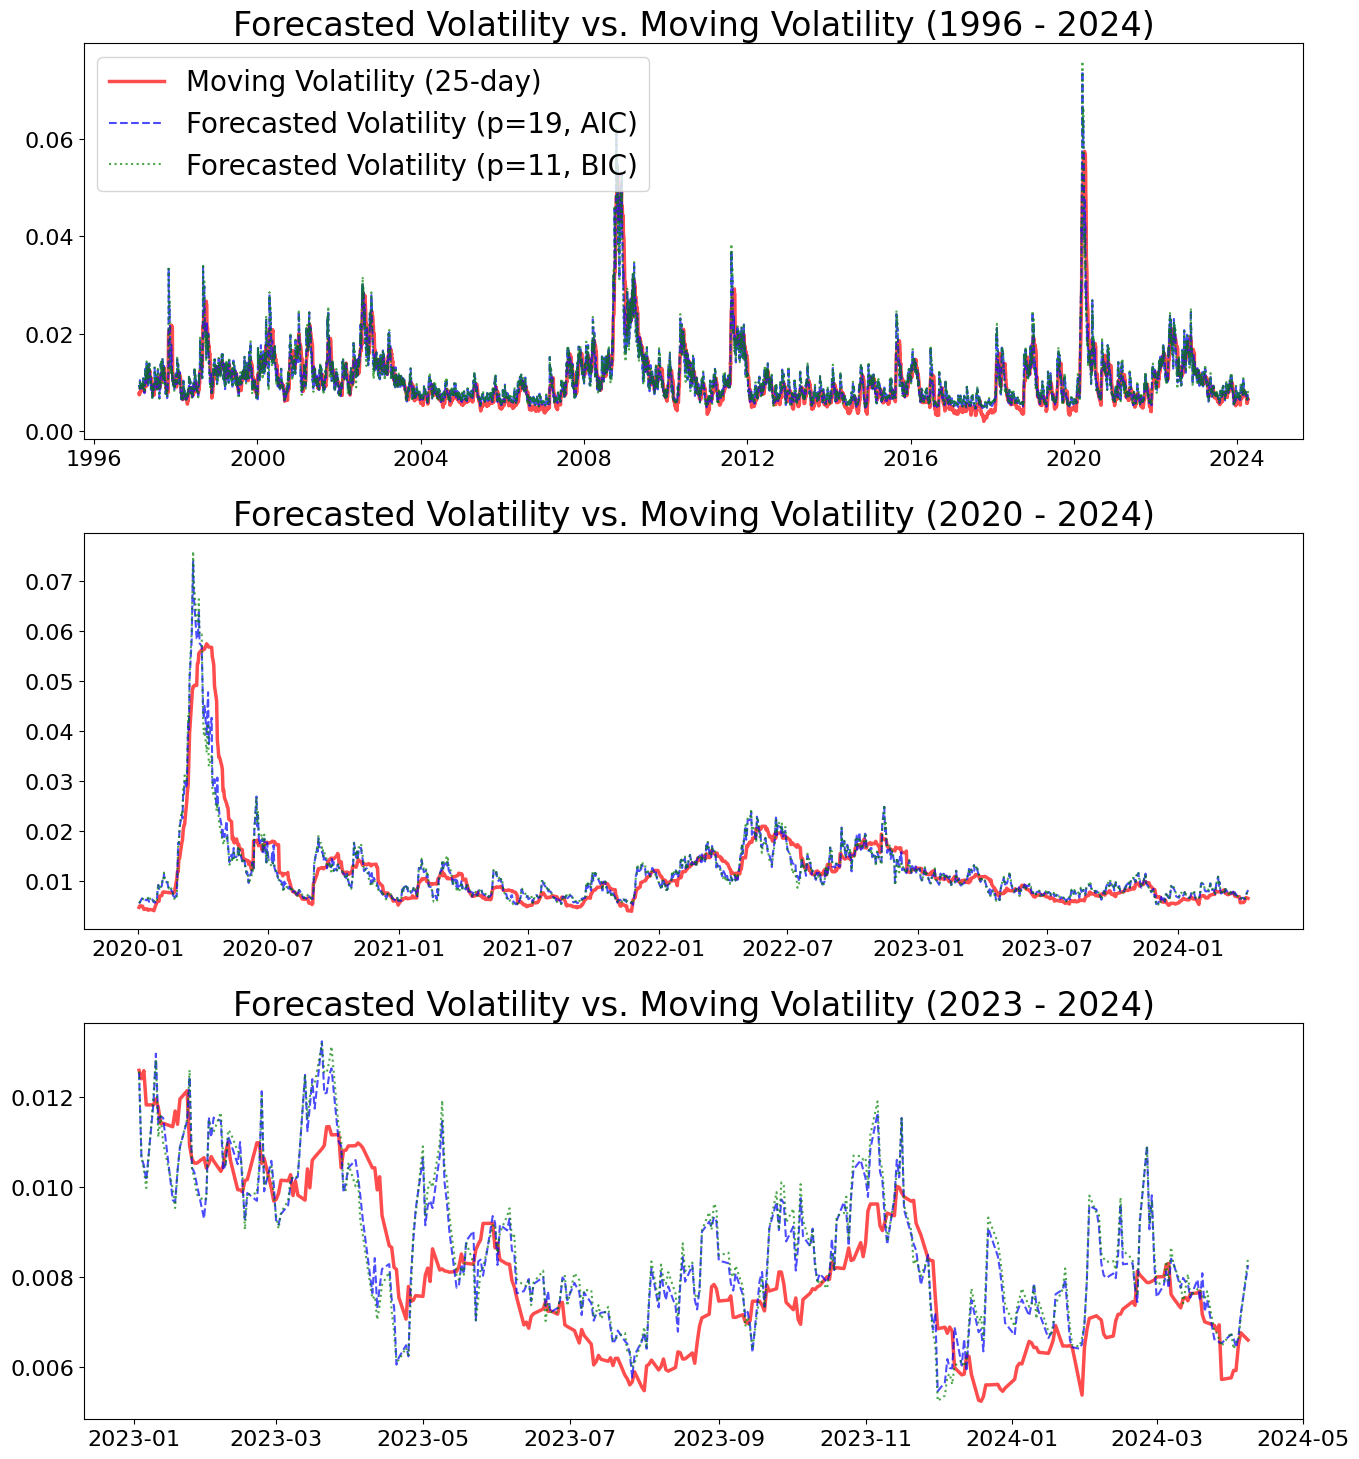

In [87]:
def forecast_volatility(LogReturns, p, q, downscale= True):
  "Fits an ARCH model with specified p and forecasts its volatility"
  # ARCH model
  am = arch_model(LogReturns, p=p, o=0, q=q)
  res = am.fit(disp=False)
  # Forecast the volatility
  forecasts = res.forecast(horizon=1, start=0, reindex=True, align='target')
  forecasted_variance = forecasts.variance
  forecasted_volatility = np.sqrt(forecasted_variance)
  if downscale:
    # we downscale the data since it was rescaled before
    forecasted_volatility = forecasted_volatility / 100
  return forecasted_volatility.iloc[:, 0]  # Return the DataFrame as a Series

# Optimal p values based on AIC and BIC
p_aic = 19
p_bic = 11

# Forecast volatility
forecasted_volatility_aic = forecast_volatility(LogReturns, p_aic, 0)
forecasted_volatility_bic = forecast_volatility(LogReturns, p_bic, 0)


# Plotting
fig, axes = plt.subplots(3, 1, figsize= (14, 15), sharex= False)

# Plot 1: Full Time Series
axes[0].plot(df.index, df["MV"], label="Moving Volatility (25-day)", color="red", linewidth=2.5, alpha=0.7)
axes[0].plot(forecasted_volatility_aic.index, forecasted_volatility_aic, 'b--', label="Forecasted Volatility (p=19, AIC)", alpha=0.7)
axes[0].plot(forecasted_volatility_bic.index, forecasted_volatility_bic, 'g:', label="Forecasted Volatility (p=11, BIC)", alpha=0.7)
axes[0].set_title("Forecasted Volatility vs. Moving Volatility (1996 - 2024)")
axes[0].legend()

# Plot 2: 2020 - 2024 Period
start_date = '2020-01-01'
df_period = df.loc[start_date:]
forecasted_volatility_aic_period = forecasted_volatility_aic.loc[start_date:]
forecasted_volatility_bic_period = forecasted_volatility_bic.loc[start_date:]

axes[1].plot(df_period.index, df_period["MV"], color="red", linewidth=2.5, alpha=0.7)
axes[1].plot(forecasted_volatility_aic_period.index, forecasted_volatility_aic_period, 'b--', alpha=0.7)
axes[1].plot(forecasted_volatility_bic_period.index, forecasted_volatility_bic_period, 'g:', alpha=0.7)
axes[1].set_title("Forecasted Volatility vs. Moving Volatility (2020 - 2024)")

# Plot 3: 2023 - 2024 period
df_short_period = df['2023-01-01':]
forecasted_volatility_aic_short_period = forecasted_volatility_aic['2023':]
forecasted_volatility_bic_short_period = forecasted_volatility_bic['2023':]

axes[2].plot(df_short_period.index, df_short_period["MV"], color="red", linewidth=2.5, alpha=0.7)
axes[2].plot(forecasted_volatility_aic_short_period.index, forecasted_volatility_aic_short_period, 'b--', alpha=0.7)
axes[2].plot(forecasted_volatility_bic_short_period.index, forecasted_volatility_bic_short_period, 'g:', alpha=0.7)
axes[2].set_title("Forecasted Volatility vs. Moving Volatility (2023 - 2024)")

plt.tight_layout()
plt.show()

I think the model is well performing, since it is coherent with our results on the moving volatility. Moreover, thanks to the second plot we can see that the 25-day moving volatility as a lower resolution, since its a rolling statistic.

With the third plot, we are able to see that the number of parameters ($p$) indicated from both criteria, cast similar results. From now on, we will use BIC's parameter since it favors simpler models. It is interesting to see that the lower the parameter, the higher the volatility forcasted in the peaks.

# Exercise 3. Volatility forecast with GARCH models

To fit a GARCH model you just have to select $p,q\neq0$ in the arch_model(returns, p, o, q) function

**1. Fit a GARCH model**

In [88]:
am = arch_model(returns, p=1, o=0, q=1)

res = am.fit()

print("\n")

print(res.summary)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3118106421.4755883
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3796135803.850008
Iteration:      3,   Func. Count:     22,   Neg. LLF: 13538.47430062833
Iteration:      4,   Func. Count:     29,   Neg. LLF: 9831.16265908756
Iteration:      5,   Func. Count:     35,   Neg. LLF: 9667.426952512375
Iteration:      6,   Func. Count:     41,   Neg. LLF: 9608.273435547311
Iteration:      7,   Func. Count:     47,   Neg. LLF: 9696.464917207679
Iteration:      8,   Func. Count:     53,   Neg. LLF: 9592.014977221179
Iteration:      9,   Func. Count:     58,   Neg. LLF: 9592.010298915533
Iteration:     10,   Func. Count:     64,   Neg. LLF: 9591.921995011011
Iteration:     11,   Func. Count:     69,   Neg. LLF: 9591.921002994408
Iteration:     12,   Func. Count:     74,   Neg. LLF: 9591.921002588399
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9591.921002588399
            Iterations: 12
 

**2. Determine the optimal values for $p$ and $q$**

Same as before, but with 2 parameters. Plot the results in a 2D plot (imshow, matshow, pcolormesh, contourf, whatever)

**Note:** *This will take a while as you now have to search for 2 optimal parameters.*

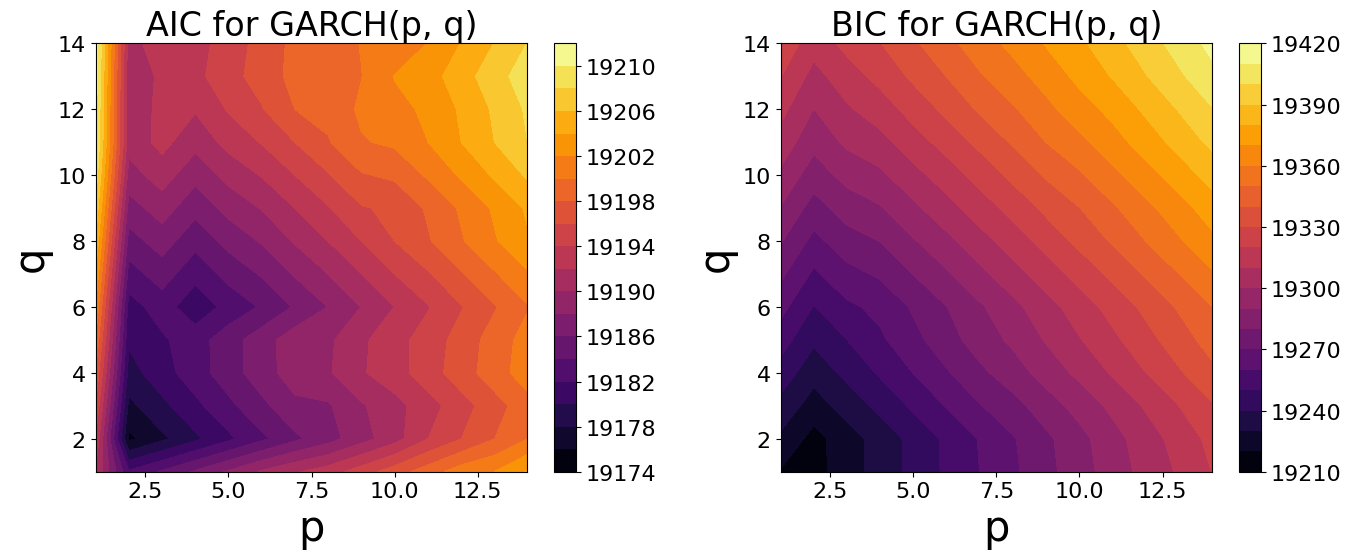

AIC's optimal (p, q) = (2, 2)
BIC's optimal (p, q) = (2, 1)


In [94]:
# Define ranges
p_values = range(1, 15)
q_values = range(1, 15)

# Matricesfor value storing
aic_values = np.zeros((len(p_values), len(q_values)))
bic_values = np.zeros((len(p_values), len(q_values)))

# Fit GARCH models and store values
for i, p in enumerate(p_values):
  for j, q in enumerate(q_values):
    model = arch_model(LogReturns, p=p, o=0, q=q)
    res = model.fit(disp='off')
    aic_values[i, j] = res.aic
    bic_values[i, j] = res.bic

# Create meshgrid for plotting
P, Q = np.meshgrid(p_values, q_values)

# Plot AIC values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
cp = plt.contourf(P, Q, aic_values.T, cmap='inferno', levels=20)
# .T : Transposes data, else p & q would get mixed up
plt.colorbar(cp)
plt.title('AIC for GARCH(p, q)')
plt.xlabel('p')
plt.ylabel('q')

# Plot BIC values
plt.subplot(1, 2, 2)
cp = plt.contourf(P, Q, bic_values.T, cmap='inferno', levels=20)
plt.colorbar(cp)
plt.title('BIC for GARCH(p, q)')
plt.xlabel('p')
plt.ylabel('q')

plt.tight_layout()
plt.show()

# Minimum AIC and BIC index
min_aic_idx = np.unravel_index(aic_values.argmin(), aic_values.shape)
min_bic_idx = np.unravel_index(bic_values.argmin(), bic_values.shape)

# Optimal p & q values
opt_p_aic, opt_q_aic = p_values[min_aic_idx[0]], q_values[min_aic_idx[1]]
opt_p_bic, opt_q_bic = p_values[min_bic_idx[0]], q_values[min_bic_idx[1]]

print(f"AIC's optimal (p, q) = ({opt_p_aic}, {opt_q_aic})")
print(f"BIC's optimal (p, q) = ({opt_p_bic}, {opt_q_bic})")

Observation: with a GARCHS model, we need less parameters ($\#(p + q) = 4 \; or \; 3$) than with an ARCH model ($\#p = 19 \; or \; 11$). This is because the GARCH model includes past variances in its formulation, enabling it to model volatility clustering more efficiently.

**3. Forecasts**

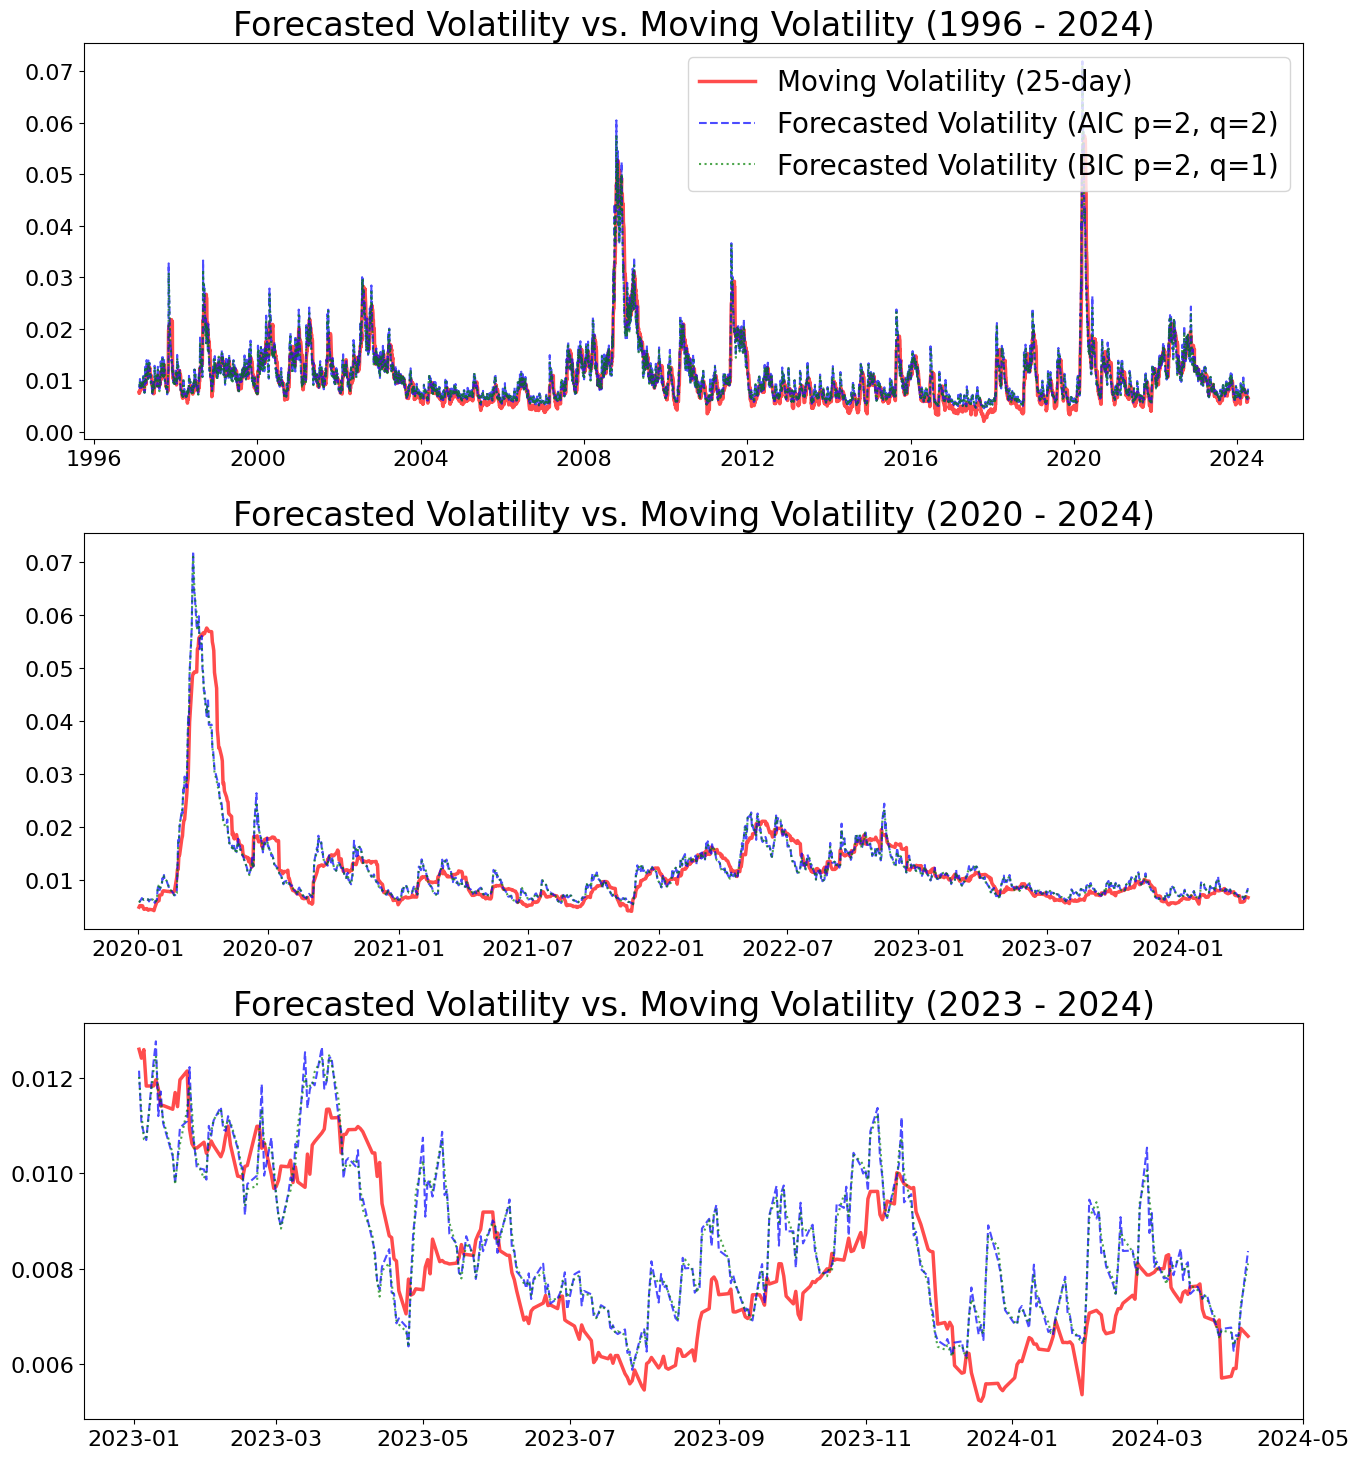

In [95]:
# Forecast volatility
forecasted_volatility_aic = forecast_volatility(LogReturns, opt_p_aic, opt_q_aic)
forecasted_volatility_bic = forecast_volatility(LogReturns, opt_p_bic, opt_q_bic)

# Plotting
fig, axes = plt.subplots(3, 1, figsize= (14, 15), sharex= False)

# Plot 1: Full Time Series
axes[0].plot(df.index, df["MV"], label="Moving Volatility (25-day)", color="red", linewidth=2.5, alpha=0.7)
axes[0].plot(forecasted_volatility_aic.index, forecasted_volatility_aic, 'b--', label="Forecasted Volatility (AIC p=2, q=2)", alpha=0.7)
axes[0].plot(forecasted_volatility_bic.index, forecasted_volatility_bic, 'g:', label="Forecasted Volatility (BIC p=2, q=1)", alpha=0.7)
axes[0].set_title("Forecasted Volatility vs. Moving Volatility (1996 - 2024)")
axes[0].legend()

# Plot 2: 2020 - 2024 Period
start_date = '2020-01-01'
df_period = df.loc[start_date:]
forecasted_volatility_aic_period = forecasted_volatility_aic.loc[start_date:]
forecasted_volatility_bic_period = forecasted_volatility_bic.loc[start_date:]

axes[1].plot(df_period.index, df_period["MV"], color="red", linewidth=2.5, alpha=0.7)
axes[1].plot(forecasted_volatility_aic_period.index, forecasted_volatility_aic_period, 'b--', alpha=0.7)
axes[1].plot(forecasted_volatility_bic_period.index, forecasted_volatility_bic_period, 'g:', alpha=0.7)
axes[1].set_title("Forecasted Volatility vs. Moving Volatility (2020 - 2024)")

# Plot 3: 2023 - 2024 period
df_short_period = df['2023-01-01':]
forecasted_volatility_aic_short_period = forecasted_volatility_aic['2023':]
forecasted_volatility_bic_short_period = forecasted_volatility_bic['2023':]

axes[2].plot(df_short_period.index, df_short_period["MV"], color="red", linewidth=2.5, alpha=0.7)
axes[2].plot(forecasted_volatility_aic_short_period.index, forecasted_volatility_aic_short_period, 'b--', alpha=0.7)
axes[2].plot(forecasted_volatility_bic_short_period.index, forecasted_volatility_bic_short_period, 'g:', alpha=0.7)
axes[2].set_title("Forecasted Volatility vs. Moving Volatility (2023 - 2024)")

plt.tight_layout()
plt.show()

**4. ARCH or GARCH?**

Compare the best fit models $ARCH(p^*)$ and $GARCH(p^*,q^*)$ to determine which is the overall best one.

Since

In [96]:
LogReturns = df_fit['LogRet'].dropna()

# ARCH's p*
p_0_aic = int(min_p_aic), 0
p_0_bic = int(min_p_bic), 0
# GARCH's p* & q*
p_q_aic = opt_p_aic, opt_q_aic
p_q_bic = opt_p_bic, opt_q_bic

#print(p_0_aic, p_0_bic, p_q_aic, p_q_bic, sep='\n')

def param2aic(p_q):
  p,q = p_q
  am = arch_model(LogReturns, p=p, o=0, q=q)
  result = am.fit(disp=False)
  return result.aic

# Dictionary to store AIC values
AICs = {}
for p_q in [p_0_aic, p_0_bic, p_q_aic, p_q_bic]:
  aic = param2aic(p_q)
  AICs[p_q] = aic
  print(f'(p,q) = {p_q}, \t AIC = {aic}')

# Find the parameter set with the smallest BIC
min_bic_key = min(AICs, key=AICs.get)
min_bic_val = bic_values[min_bic_key]

print('\n', f'(p,q) = {min_bic_key} has the smallest AIC parameter.')

(p,q) = (19, 0), 	 AIC = 19195.821140518976
(p,q) = (11, 0), 	 AIC = 19205.97605529644
(p,q) = (2, 2), 	 AIC = 19175.578524792352
(p,q) = (2, 1), 	 AIC = 19182.289055820074

 (p,q) = (2, 2) has the smallest AIC parameter.


(p,q) = (2, 2) seems to be the best approach in terms of optimisation.

# Exercise 4. Simulation of ARCH and GARCH processes

**1. Simulate price dynamics with an ARCH and GARCH model**

We will use the ARCH(11) and GARCH(2,2) models, as we previously found that these were the optimal parameters.

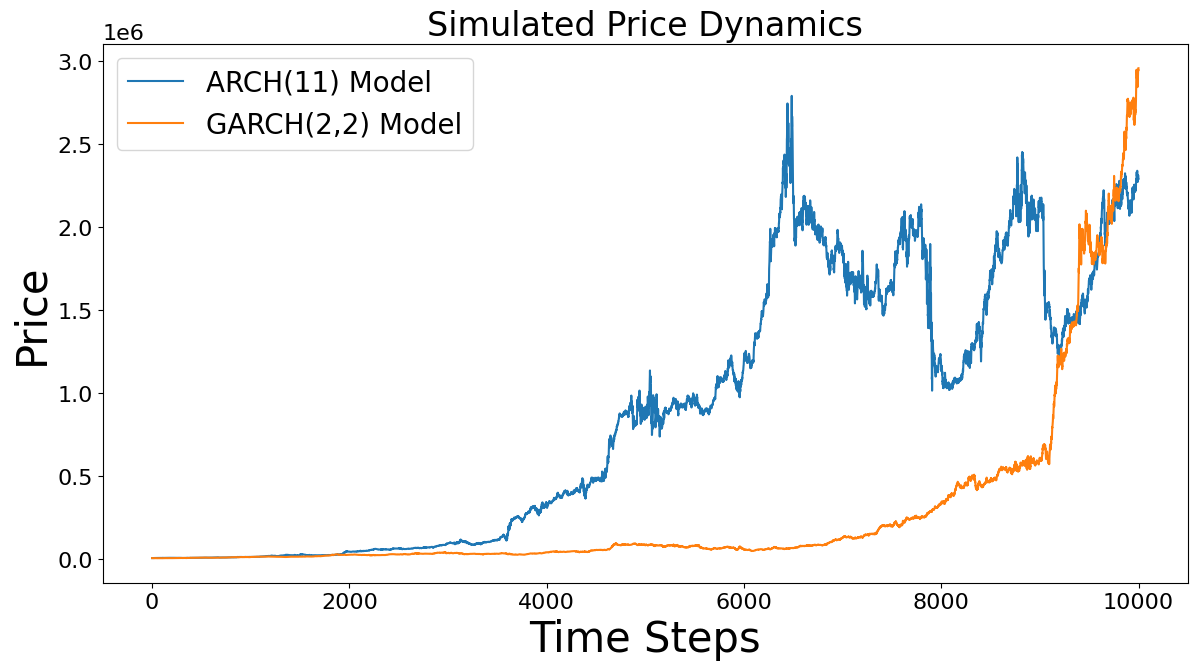

In [97]:
N_steps = 10**4

# Scale the returns
LogRet_scaled = df['LogRet'].dropna()*100

# Fitting
params_arch = arch_model(LogRet_scaled, p=11, o=0, q=0).fit(disp=False).params
params_garch = arch_model(LogRet_scaled, p=2, o=0, q=2).fit(disp=False).params

# Scale back returns
sim_arch = arch_model(None, p=11, o=0, q=0).simulate(params_arch, N_steps) / 100
sim_garch = arch_model(None, p=2, o=0, q=2).simulate(params_garch, N_steps) / 100

# Initial values
S_0 = df.iloc[-1]["Adj Close"]
t_0 = df.iloc[-1].name

# Prices
S_t_arch = S_0 * np.exp(np.cumsum(sim_arch['data']))
S_t_garch = S_0 * np.exp(np.cumsum(sim_garch['data']))

# Plotting the simulated price paths
plt.figure(figsize=(14, 7))
plt.plot(S_t_arch, label='ARCH(11) Model')
plt.plot(S_t_garch, label='GARCH(2,2) Model')
plt.title('Simulated Price Dynamics')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

**2. Plot the simulated returns, volatility and prices**

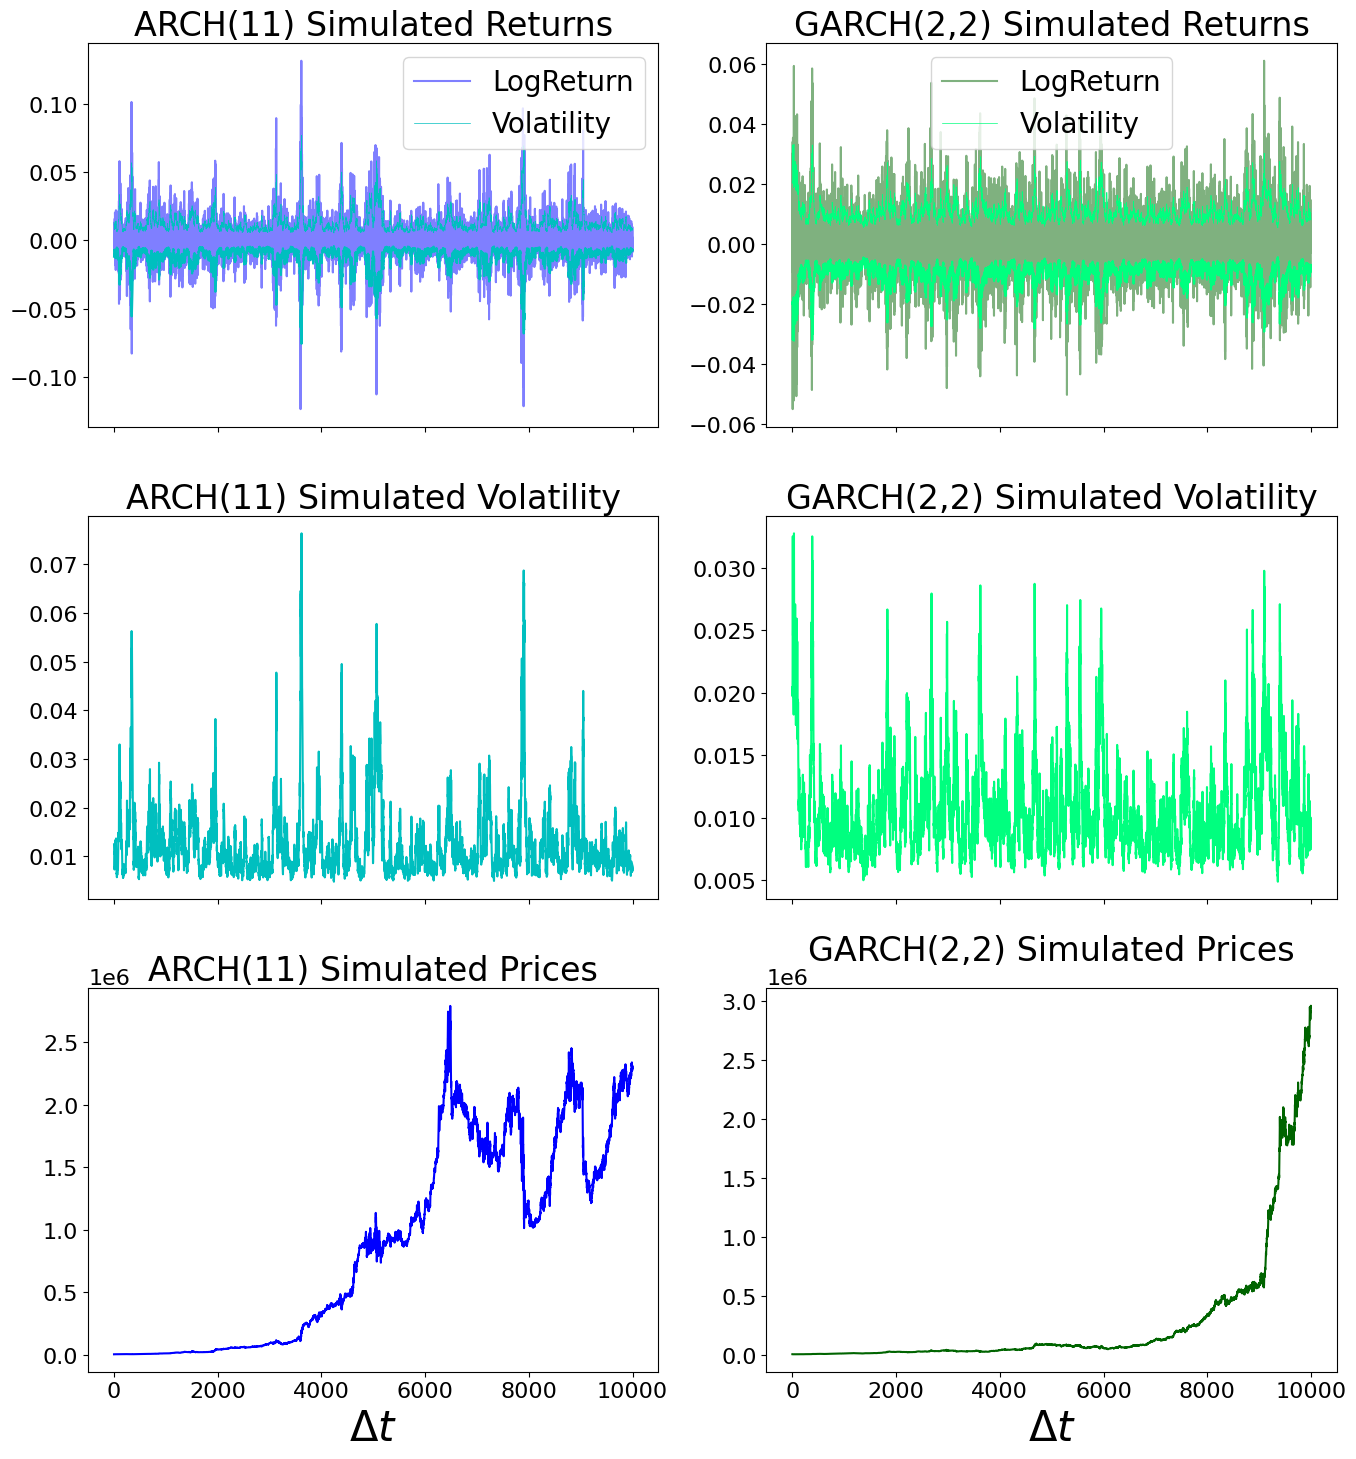

In [98]:
MeanLogRet = sim_arch['data'].mean()


# Plotting
fig, axs = plt.subplots(3, 2, figsize=(14, 15), sharex=True)

# Plot ARCH Returns
axs[0, 0].plot(sim_arch['data'], label="LogReturn", color='b', alpha=0.5)
axs[0, 0].plot(MeanLogRet + sim_arch['volatility'], label="Volatility", color="c", linewidth=.5)
axs[0, 0].plot(MeanLogRet - sim_arch['volatility'], color="c")

axs[0, 0].legend()
axs[0, 0].set_title('ARCH(11) Simulated Returns')

# Plot GARCH Returns
axs[0, 1].plot(sim_garch['data'], label="LogReturn", color='darkgreen', alpha=0.5)
axs[0, 1].plot(MeanLogRet + sim_garch['volatility'], label="Volatility", color="springgreen", linewidth=.5)
axs[0, 1].plot(MeanLogRet - sim_garch['volatility'], color="springgreen")

axs[0, 1].legend()
axs[0, 1].set_title('GARCH(2,2) Simulated Returns')

# Plot ARCH Volatility
axs[1, 0].plot(sim_arch['volatility'], color='c')
axs[1, 0].set_title('ARCH(11) Simulated Volatility')

# Plot GARCH Volatility
axs[1, 1].plot(sim_garch['volatility'], color='springgreen')
axs[1, 1].set_title('GARCH(2,2) Simulated Volatility')

# Plot ARCH Prices
axs[2, 0].plot(S_t_arch, color='b')
axs[2, 0].set_title('ARCH(11) Simulated Prices')
axs[2, 0].set_xlabel('$\Delta t$')

# Plot GARCH Prices
axs[2, 1].plot(S_t_garch, color='darkgreen')
axs[2, 1].set_title('GARCH(2,2) Simulated Prices')
axs[2, 1].set_xlabel('$\Delta t$')

plt.tight_layout()
plt.show()

**3. Plot different realisations of the future simulated prices**

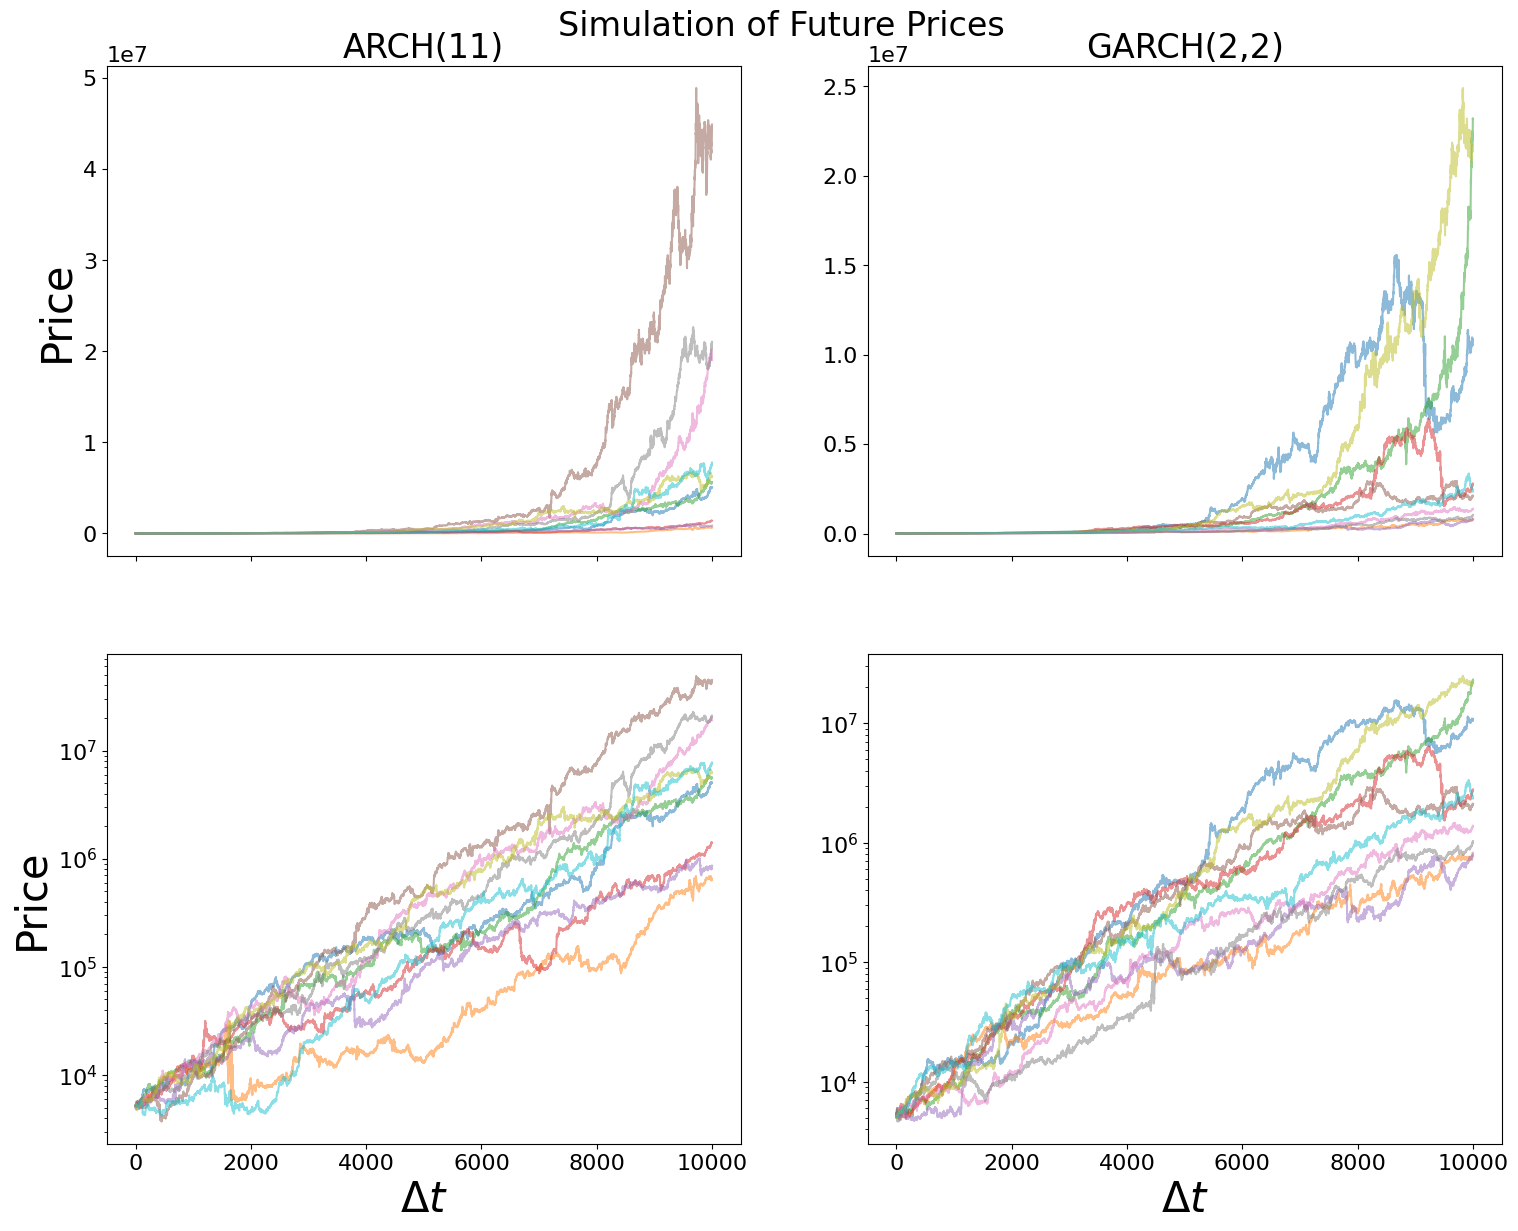

In [99]:
# Number of simulation
n_simulation = 10

def future_prices_simulator(S_0, params, p, q, n_steps, n_simulation):
  future_prices = []
  for _ in range(n_simulation):
    sim_results = arch_model(None, p=p, o=0, q=q).simulate(params, n_steps) / 100
    sim_returns = sim_results['data']
    prices = S_0 * np.exp(np.cumsum(sim_returns))
    future_prices.append(prices)
  return future_prices

# Future prices
future_prices_arch  = future_prices_simulator(S_0, params_arch, 11, 0, N_steps, n_simulation)
future_prices_garch = future_prices_simulator(S_0, params_garch, 2, 2, N_steps, n_simulation)

# Plotting
fig, axs = plt.subplots(2, 2, figsize= (18, 14), sharex=True)

def subplot_simulation(ax, prices, scale):
  # Plotting the simulated future price paths
  for price in prices:
    ax.plot(price, alpha=0.5)
  ax.set(yscale=scale)

subplot_simulation(axs[0, 0], future_prices_arch, 'linear')
axs[0, 0].set_title('ARCH(11)')
axs[0, 0].set_ylabel('Price')
subplot_simulation(axs[0, 1], future_prices_garch, 'linear')
axs[0, 1].set_title('GARCH(2,2)')
subplot_simulation(axs[1, 0], future_prices_arch, 'log')
axs[1, 0].set_xlabel('$\Delta t$')
axs[1, 0].set_ylabel('Price')
subplot_simulation(axs[1, 1], future_prices_garch, 'log')
axs[1, 1].set_xlabel('$\Delta t$')
plt.suptitle(f"Simulation of Future Prices", y=0.92)
plt.show()

**4. Plot the return distribution of the data (S&P 500), and the ones simulated with the ARCH and GARCH models**

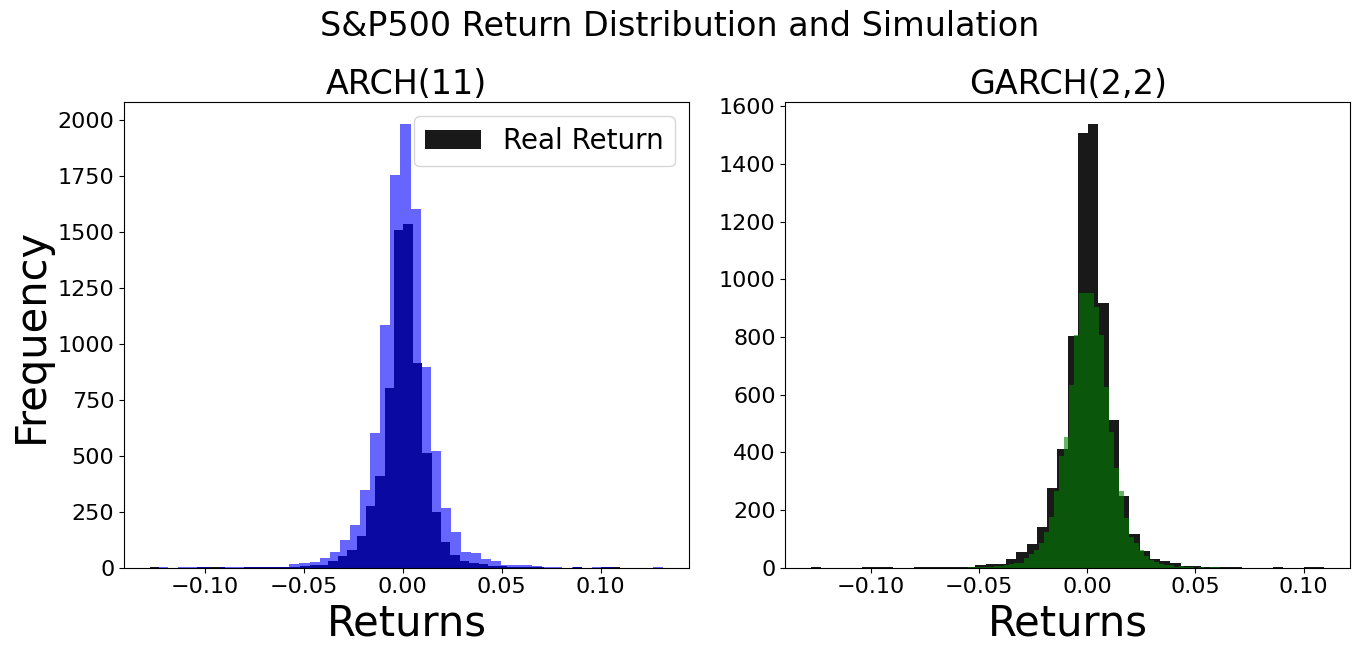

In [100]:
# Plot the distributions using histograms
fig, axs = plt.subplots(1,2, figsize=(14, 7))

# Simulated ARCH Returns
axs[0].hist(LogReturns/100, bins=50, alpha=0.9, color='k', label='Real Return')
axs[0].hist(sim_arch['data'], bins= 50, alpha=0.6, color='b')
axs[0].set(title='ARCH(11)', ylabel='Frequency', xlabel='Returns')
axs[0].legend()

# Simulated GARCH Returns
axs[1].hist(LogReturns/100, bins=50, alpha=0.9, color='k', label='Real Return')
axs[1].hist(sim_garch['data'], bins=50, alpha=0.6, color='g')
axs[1].set(title='GARCH(2,2)', xlabel='Returns')

plt.suptitle('S&P500 Return Distribution and Simulation', y= 0.95)
plt.tight_layout()
plt.show()
